# ML/DL for Everyone

### 출처

- 모두를 위한 딥러닝 시즌2
- 링크: [모두를 위한 딥러닝 시즌2](https://www.youtube.com/watch?v=7eldOrjQVi0&list=PLQ28Nx3M4Jrguyuwg4xe9d9t2XE639e5C)

<br/>

## MNIST

<hr/>

- MNIST: handwritten digits dataset

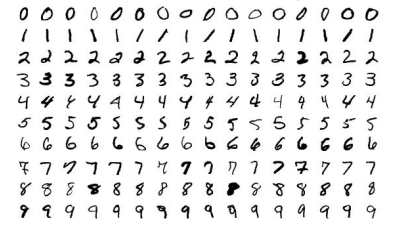

- 편지의 우편번호에 적혀있는 숫자들을 자동으로 인식하고 싶어서 만들어진 데이터셋
- train set: 6만 장의 samples
- test set: 1만 장의 samples

<br/>

MNIST 데이터의 생김새는 아래와 같다.

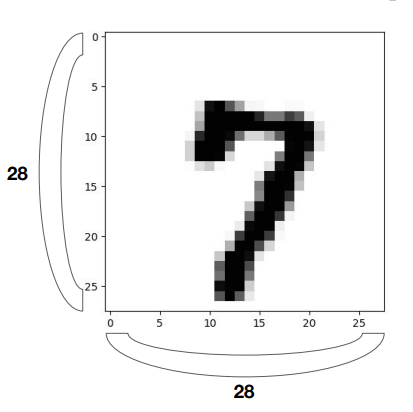

- 28 x 28 image
- 1 channel gray image
- 0 ~ 9 digits

```python
for X, Y in data_loader:
    # reshape input image inte [batch_size by 784]
    # label is not one-hot encoded
    X = X.view(-1, 28 * 28) # view 함수를 이용해 784개의 input으로 바꿔줌
```

<br/>

### torchvision

<hr/>

torchvision은 굉장히 유명한 데이터셋들(ex- MNIST, Fashion-MNIST, COCO, Imagenet 등)을 제공하는 패키지인 **torchvision.datasets**, 모델 architecture(ex-Alexnet, VGG, ResNet, SqueezeNet 등)를 제공하는 **torchvision.models**, 데이터에 다양하게 적용할 수 있는 전처리(preprocessing)를 할 수 있는 **torchvision.transforms**, 데이터셋을 쉽게 읽어올 수 있도록 **torchvision.utils** 패키지 등을 가지고 있다.
<br/>
토치비전 도큐먼트 링크: [TorchVision Documentation](https://pytorch.org/docs/stable/torchvision/index.html)

<br/>

#### Reading data with torchvision

```python
import torchvision.datasets as dsets   # 토치비전에 있는 데이터셋을 사용
...

mnist_train = dsets.MNIST(root="MNIST_data/", train=True, transform=transforms.ToTensor(),
download=True)

mnist_test = dsets.MNIST(root="MNIST_data/", train=False, transform=transforms.ToTensor(),
download=True)

data_loader = torch.utils.DataLoader(DataLoader=mnist_train, batch_size=batch_size,
shuffle=True, drop_last=True)
...
for epoch in range(training_epochs):
...
    # X는 MNIST 이미지, y는 레이블(0~9)를 불러옴
    for X, Y in data_loader:
    # reshape input image into [batch_size by 784]
    # label is not one-hot encoded
    X = X.view(-1, 28 * 28).to(device)
```

<br/>

#### 설명

```python
mnist_train = dsets.MNIST(root="MNIST_data/", train=True, transform=transforms.ToTensor(),
download=True)

mnist_test = dsets.MNIST(root="MNIST_data/", train=False, transform=transforms.ToTensor(),
download=True)
```

- MNIST 함수 사용
- root=MNIST데이터의경로
- train=True: train set을 불러온다
- train=False: test set을 불러온다
- transform: 어떤 transform을 적용해서 이미지를 불러올 것인지
- 일반적인 이미지는 0~255의 값을 가지고 높이, 너비, 채널 순서로 데이터를 가지고 있다.
- 반면 pytorch에서는 일반적으로 이미지는 0~1의 값과 채널, 높이, 너비의 순으로 데이터를 가지고 있다.
- 이미지의 순서와 값들을 pytorch에 맞게 바꿔주는 것이 **transforms.ToTensor()**가 해주는 역할이다.

<br/>

```python
data_loader = torch.utils.DataLoader(DataLoader=mnist_train, batch_size=batch_size,
shuffle=True, drop_last=True)
```
- DataLoader: 어떤 데이터를 가져올 것인지
- batch_size: 몇 개씩 잘라서 불러올 것인지
- shuffle: 무작위로 가져올 것인지
- drop_last: batch_size만큼 잘라서 가져올 때 맨뒤에 남는 것을 사용하지 않을 것인지

<br/>

### Epoch / Batch size / Iteration

<hr/>

- 출처: https://stackoverflow.com/questions/4752626/epoch-vs-iteration-when-training-neural-networks

<br/>

- **one epoch** = one forward pass and one backward pass of all the training examples
- **batch size** = the number of training examples in one forward/backward pass. The  higher the batch size, the more memory space you'll need.
- **number of iterations** = number of passes, each pass using [batch size] number of examples. To be clear, one pass = one forward pass + one backward pass (we do not count the forward pass and backward pass as two different passes).

<br/>

MNIST의 train set은 총 6만 장의 samples로 구성되어있는데 이 6만 장 **전체가 학습되었을 때, 1 epoch**을 돌았다라고 표현한다.<br/>
한 epoch을 돌기 위해서 6만 장을 전부 다 학습에 사용해야 하는데 가능하다면 6만 장을 한 번에 학습에 사용한다면 매우 좋겠지만 그렇게 사용하기에는 메모리도 부족하고 시간도 오래 걸리기 때문에 잘라서 사용하는데 이 자르는 크기를 **batch size**라고 한다. 만약 batch_size가 '100'이라면 600개의 batch(60,000 / batch_size)를 얻을 수 있을 것이다.<br/>
**iteration**은 batch를 몇 번 학습에 사용했는지를 의미하는 용어이다.

<br/>

예를 들어 **1000 개의 train set**이 있다고 가정해보자. **batch size = 500** 이면 2개의 batch가 있는 것이고 이 batch를 이용해 **2번의 iteration**을 학습하게 되면 **1 epoch**이 완료되게 된다.

<br/><br/>

### Softmax

<hr/>

```python
# MNIST data image of shape 28 * 28 = 784 Softmax
linear = torch.nn.Linear(784, 10, bias=True).to(device)

# initialization
torch.nn.init.normal_(linear.weight)

# parameters
training_epochs = 15
batch_size = 100

# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device) # Softmax is internally computed.
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

```

- 입력값은 28 * 28 = 784, 레이블은 10개(0~9)이기 때문에 torch.nn.Linear(784, 10, bias=True)으로 구성한다.
- 파이토치에서는 torch.nn.CrossEntropyLoss()가 Softmax를 자동으로 계산해준다.
- linear.parameters()는 Weight와 Bias를 가지고 있다.

<br/>

```python

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)
    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        optimier.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward() 
        avg_cost += cost / total_batch
    print("Epoch: ", "%04d" % (epoch+1), "cost =", "{:.9f}".format(avg_cost))
```

- 15 epoch만큼 학습 반복
- hypothesis와 cost는 위의 코드에서 정의한 함수에 의해 계산된다.

<br/><br/>

### Test

<hr/>

```python
# Test the model using test sets
With torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)
    
    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print("Accuracy: ", accuracy.item())
```

- test set을 이용한 테스트 진행
- **torch.no_grad()**는 gradient 계산을 하지 않겠다는 의미이다.

<br/><br/>

### Visualization

<hr/>

```python
import matplotlib.pyplot as plt
import random
...
r = random.randint(0, len(mnist_test) - 1)
X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 *
28).float().to(device)
Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

print("Label: ", Y_single_data.item())
single_prediction = linear(X_single_data)
print("Prediction: ", torch.argmax(single_prediction,
1).item())

plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28),
cmap="Greys", interpolation="nearest")
plt.show()
```

- 예측한 이미지를 matplotlib을 이용해 띄어본 결과

<br/><br/>

### 코드 정리

<hr/>

- 패키지 import

In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

<br/>

- 기본 설정

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [3]:
# parameters
training_epochs = 15
batch_size = 100

# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

# MNIST data image of shape 28 * 28 = 784
linear = torch.nn.Linear(784, 10, bias=True).to(device)

# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

0.0%

31.0%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

77.2%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100.0%


Extracting MNIST_data/MNIST\raw\train-images-idx3-ubyte.gz to MNIST_data/MNIST\raw


102.8%


Extracting MNIST_data/MNIST\raw\train-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw




10.7%

100.0%


Extracting MNIST_data/MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST_data/MNIST\raw



112.7%

Extracting MNIST_data/MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw



<br/>

- 학습시키기

In [5]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.272883683
Epoch: 0002 cost = 0.271629602
Epoch: 0003 cost = 0.270609796
Epoch: 0004 cost = 0.269295007
Epoch: 0005 cost = 0.268277347
Epoch: 0006 cost = 0.267255455
Epoch: 0007 cost = 0.266613454
Epoch: 0008 cost = 0.265661418
Epoch: 0009 cost = 0.264922321
Epoch: 0010 cost = 0.263888717
Epoch: 0011 cost = 0.263269782
Epoch: 0012 cost = 0.262586176
Epoch: 0013 cost = 0.261751652
Epoch: 0014 cost = 0.261135817
Epoch: 0015 cost = 0.260536879
Learning finished


<br/>

- 테스트하기

In [9]:
# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

Accuracy: 0.8704999685287476


<br/>

- 시각화해보기

Label:  3
Prediction:  3


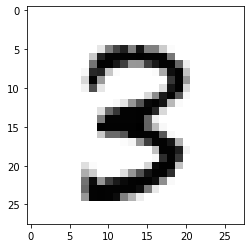

In [11]:
# Get one and predict
r = random.randint(0, len(mnist_test) - 1)
X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

print('Label: ', Y_single_data.item())
single_prediction = linear(X_single_data)
print('Prediction: ', torch.argmax(single_prediction, 1).item())

plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
plt.show()